In [1]:
import csv
from pathlib import Path
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSVs
## Ours

In [2]:
def process_csv(path):
    df = pd.read_csv(path, sep=",", quotechar='"', engine='python')
    df["frame_num"] = df["frame_num"].astype(int)
    df["time_elapsed"] = df["time_elapsed"].astype(float)
    df['bboxes'] = df['bboxes'].apply(ast.literal_eval)
    df["fps"] = 1000 / df["time_elapsed"]
    df["s"] = df["frame_num"] / 30
    return df

In [3]:
df_detection = process_csv("../data/demos/irl-stream-long-30fps-ours-detection-only.csv")
df_detection

,frame_num,time_elapsed,bboxes,fps,s
0,0,44.325825,"[[0.26093652844429016, 0.1395616978406906, 0.4...",22.560212,0.000000
1,1,7.949312,"[[0.252800315618515, 0.1507650911808014, 0.415...",125.797047,0.033333
2,2,9.086976,"[[0.23703250288963318, 0.16085031628608704, 0....",110.047610,0.066667
3,3,9.401344,"[[0.2191130369901657, 0.1653076708316803, 0.39...",106.367767,0.100000
4,4,12.041216,"[[0.20900173485279083, 0.16227540373802185, 0....",83.048092,0.133333
...,...,...,...,...,...
10795,10795,7.620608,"[[0.32665079832077026, 0.28330785036087036, 0....",131.223128,359.833333
10796,10796,7.640960,"[[0.3301618993282318, 0.27743619680404663, 0.3...",130.873604,359.866667
10797,10797,17.181696,"[[0.3337004780769348, 0.2807047665119171, 0.37...",58.201472,359.900000
10798,10798,7.545792,"[[0.33852308988571167, 0.28046178817749023, 0....",132.524192,359.933333


In [4]:
df_tracker = process_csv("../data/demos/irl-stream-long-30fps-ours-tracker-only.csv")
df_tracker

,frame_num,time_elapsed,bboxes,fps,s
0,0,42.844158,"[[0.5625, 0.3812499940395355, 0.60833334922790...",23.340405,0.000000
1,1,19.490623,"[[0.5625, 0.3843746781349182, 0.60833334922790...",51.306722,0.033333
2,2,10.033152,"[[0.5604524612426758, 0.3892298638820648, 0.60...",99.669579,0.066667
3,3,7.664576,"[[0.558445155620575, 0.3915879428386688, 0.606...",130.470360,0.100000
4,4,10.055680,"[[0.5562050938606262, 0.39320412278175354, 0.6...",99.446280,0.133333
...,...,...,...,...,...
10795,10795,7.538688,"[[0.7095203399658203, 0.3420988619327545, 0.75...",132.649073,359.833333
10796,10796,7.875584,"[[0.7129213213920593, 0.3390175700187683, 0.75...",126.974709,359.866667
10797,10797,8.573952,"[[0.7153435945510864, 0.3381081521511078, 0.75...",116.632334,359.900000
10798,10798,7.409632,"[[0.714949905872345, 0.33627310395240784, 0.75...",134.959465,359.933333


In [5]:
df_dr = process_csv("../data/demos/irl-stream-long-30fps-ours-detection-recognition.csv")
df_dr

,frame_num,time_elapsed,bboxes,fps,s
0,0,53.738495,"[[0.26093652844429016, 0.1395616978406906, 0.4...",18.608634,0.000000
1,1,18.081793,"[[0.252800315618515, 0.1507650911808014, 0.415...",55.304250,0.033333
2,2,17.750015,"[[0.23703250288963318, 0.16085031628608704, 0....",56.337980,0.066667
3,3,18.069504,"[[0.2191130369901657, 0.1653076708316803, 0.39...",55.341863,0.100000
4,4,19.879936,"[[0.20900173485279083, 0.16227540373802185, 0....",50.301972,0.133333
...,...,...,...,...,...
10795,10795,20.408224,"[[0.32665079832077026, 0.28330785036087036, 0....",48.999854,359.833333
10796,10796,20.322271,"[[0.3301618993282318, 0.27743619680404663, 0.3...",49.207098,359.866667
10797,10797,19.698689,"[[0.3337004780769348, 0.2807047665119171, 0.37...",50.764801,359.900000
10798,10798,20.335615,"[[0.33852308988571167, 0.28046178817749023, 0....",49.174809,359.933333


In [6]:
df_tr = process_csv("../data/demos/irl-stream-long-30fps-ours-tracker-recognition.csv")
df_tr

,frame_num,time_elapsed,bboxes,fps,s
0,0,57.350143,"[[0.5625, 0.3812499940395355, 0.60833334922790...",17.436748,0.000000
1,1,18.744320,"[[0.5625, 0.3843746781349182, 0.60833334922790...",53.349495,0.033333
2,2,18.453505,"[[0.5604524612426758, 0.3892298638820648, 0.60...",54.190249,0.066667
3,3,18.272257,"[[0.558445155620575, 0.3915879428386688, 0.606...",54.727777,0.100000
4,4,21.105728,"[[0.5562050938606262, 0.39320412278175354, 0.6...",47.380502,0.133333
...,...,...,...,...,...
10795,10795,21.258368,"[[0.7095203399658203, 0.3420988619327545, 0.75...",47.040301,359.833333
10796,10796,21.302273,"[[0.7129213213920593, 0.3390175700187683, 0.75...",46.943348,359.866667
10797,10797,20.956192,"[[0.7153435945510864, 0.3381081521511078, 0.75...",47.718593,359.900000
10798,10798,20.530176,"[[0.714949905872345, 0.33627310395240784, 0.75...",48.708788,359.933333


In [7]:
df_drbls = process_csv("../data/demos/irl-stream-long-30fps-ours-detection-recognition-blacksquare.csv")
df_drbls

,frame_num,time_elapsed,bboxes,fps,s
0,0,51.833855,"[[0.26093652844429016, 0.1395616978406906, 0.4...",19.292410,0.000000
1,1,17.994753,"[[0.252800315618515, 0.1507650911808014, 0.415...",55.571755,0.033333
2,2,19.263489,"[[0.23703250288963318, 0.16085031628608704, 0....",51.911677,0.066667
3,3,17.848320,"[[0.2191130369901657, 0.1653076708316803, 0.39...",56.027682,0.100000
4,4,20.056065,"[[0.20900173485279083, 0.16227540373802185, 0....",49.860230,0.133333
...,...,...,...,...,...
10795,10795,33.138561,"[[0.32665079832077026, 0.28330785036087036, 0....",30.176325,359.833333
10796,10796,29.190336,"[[0.3301618993282318, 0.27743619680404663, 0.3...",34.257913,359.866667
10797,10797,25.977856,"[[0.3337004780769348, 0.2807047665119171, 0.37...",38.494324,359.900000
10798,10798,29.274048,"[[0.33852308988571167, 0.28046178817749023, 0....",34.159950,359.933333


In [8]:
df_drbbc = process_csv("../data/demos/irl-stream-long-30fps-ours-detection-recognition-boxblurcircle.csv")
df_drbbc

,frame_num,time_elapsed,bboxes,fps,s
0,0,52.378593,"[[0.26093652844429016, 0.1395616978406906, 0.4...",19.091769,0.000000
1,1,20.116480,"[[0.252800315618515, 0.1507650911808014, 0.415...",49.710486,0.033333
2,2,36.844479,"[[0.23703250288963318, 0.16085031628608704, 0....",27.141109,0.066667
3,3,21.550144,"[[0.2191130369901657, 0.1653076708316803, 0.39...",46.403402,0.100000
4,4,20.161535,"[[0.20900173485279083, 0.16227540373802185, 0....",49.599397,0.133333
...,...,...,...,...,...
10795,10795,31.711231,"[[0.32665079832077026, 0.28330785036087036, 0....",31.534569,359.833333
10796,10796,25.385984,"[[0.3301618993282318, 0.27743619680404663, 0.3...",39.391815,359.866667
10797,10797,24.304640,"[[0.3337004780769348, 0.2807047665119171, 0.37...",41.144407,359.900000
10798,10798,22.545408,"[[0.33852308988571167, 0.28046178817749023, 0....",44.354930,359.933333


In [9]:
df_drgc = process_csv("../data/demos/irl-stream-long-30fps-ours-detection-recognition-guassiancircle.csv")
df_drgc

,frame_num,time_elapsed,bboxes,fps,s
0,0,52.324448,"[[0.26093652844429016, 0.1395616978406906, 0.4...",19.111525,0.000000
1,1,29.052896,"[[0.252800315618515, 0.1507650911808014, 0.415...",34.419976,0.033333
2,2,20.792320,"[[0.23703250288963318, 0.16085031628608704, 0....",48.094681,0.066667
3,3,18.180096,"[[0.2191130369901657, 0.1653076708316803, 0.39...",55.005211,0.100000
4,4,18.005089,"[[0.20900173485279083, 0.16227540373802185, 0....",55.539854,0.133333
...,...,...,...,...,...
10795,10795,35.129345,"[[0.32665079832077026, 0.28330785036087036, 0....",28.466230,359.833333
10796,10796,35.605503,"[[0.3301618993282318, 0.27743619680404663, 0.3...",28.085546,359.866667
10797,10797,36.385792,"[[0.3337004780769348, 0.2807047665119171, 0.37...",27.483255,359.900000
10798,10798,35.988480,"[[0.33852308988571167, 0.28046178817749023, 0....",27.786670,359.933333


## 'Ground Truth' - Tinaface

In [10]:
df_tina = process_csv("../data/demos/irl-stream-long-30fps-tinaface.csv")
df_tina

,frame_num,time_elapsed,bboxes,fps,s
0,0,793.615356,"[[0.2613637447357178, 0.1467597782611847, 0.41...",1.260056,0.000000
1,1,609.464233,"[[0.2500605285167694, 0.15720407664775848, 0.4...",1.640785,0.033333
2,2,608.793091,"[[0.23576350510120392, 0.16982068121433258, 0....",1.642594,0.066667
3,3,611.547180,"[[0.22362782061100006, 0.17400027811527252, 0....",1.635197,0.100000
4,4,613.920532,"[[0.212729349732399, 0.17810535430908203, 0.38...",1.628875,0.133333
...,...,...,...,...,...
10795,10795,972.909973,"[[0.3283191919326782, 0.2795014977455139, 0.36...",1.027844,359.833333
10796,10796,973.042175,"[[0.33159634470939636, 0.2785113751888275, 0.3...",1.027705,359.866667
10797,10797,973.242432,"[[0.3356862962245941, 0.27738896012306213, 0.3...",1.027493,359.900000
10798,10798,973.338745,"[[0.3385699987411499, 0.2769674062728882, 0.37...",1.027392,359.933333


## All

In [11]:
dfs = {
    "Ours - Detection Only": df_detection,
    "Ours - Tracking Only": df_tracker,
    "Ours - Detection + Recognition": df_dr,
    "Ours - Tracking + Recognition": df_tr,
    "Ours - Detection + Recognition + Black Square": df_drbls,
    "Ours - Detection + Recognition + Circular Blur": df_drbbc,
    "Ours - Detection + Recognition + Guassian Blur": df_drgc,
    "TinaFace R50-FPN-GN-DCN": df_tina
}

# Processing BBOXES

In [12]:
# Original code from https://gist.github.com/AruniRC/c629c2df0e68e23aff7dcaeef87c72d4
from __future__ import division
import scipy.optimize
import numpy as np


def bbox_iou(boxA, boxB):
    # Determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interW = xB - xA  # Removed +1 here
    interH = yB - yA  # Removed +1 here

    # Correction: reject non-overlapping boxes
    if interW <= 0 or interH <= 0:
        return 0.0  # Changed from -1.0 to 0.0 to indicate no overlap

    interArea = interW * interH
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])  # Removed +1 here
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])  # Removed +1 here
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou


def match_bboxes(bbox_gt, bbox_pred, IOU_THRESH=0.5):
    """
    Adjusted comments and code to align with fractional input.
    """
    n_true = bbox_gt.shape[0]
    n_pred = bbox_pred.shape[0]
    MAX_DIST = 1.0  # Max distance in fractional terms
    MIN_IOU = 0.0  # Minimum IOU for non-overlapping boxes

    # NUM_GT x NUM_PRED
    iou_matrix = np.zeros((n_true, n_pred))
    for i in range(n_true):
        for j in range(n_pred):
            iou_matrix[i, j] = bbox_iou(bbox_gt[i, :], bbox_pred[j, :])

    if n_pred > n_true:
        # there are more predictions than ground-truth - add dummy rows
        diff = n_pred - n_true
        iou_matrix = np.concatenate(
            (iou_matrix, np.full((diff, n_pred), MIN_IOU)), axis=0
        )

    if n_true > n_pred:
        # more ground-truth than predictions - add dummy columns
        diff = n_true - n_pred
        iou_matrix = np.concatenate(
            (iou_matrix, np.full((n_true, diff), MIN_IOU)), axis=1
        )

    # call the Hungarian matching
    idxs_true, idxs_pred = scipy.optimize.linear_sum_assignment(1 - iou_matrix)

    if (not idxs_true.size) or (not idxs_pred.size):
        ious = np.array([])
    else:
        ious = iou_matrix[idxs_true, idxs_pred]

    # remove dummy assignments
    sel_pred = idxs_pred < n_pred
    idx_pred_actual = idxs_pred[sel_pred]
    idx_gt_actual = idxs_true[sel_pred]
    ious_actual = iou_matrix[idx_gt_actual, idx_pred_actual]
    sel_valid = ious_actual > IOU_THRESH
    label = sel_valid.astype(int)

    return (
        idx_gt_actual[sel_valid],
        idx_pred_actual[sel_valid],
        ious_actual[sel_valid],
        label,
    )


In [13]:
IOU_THRESH = 0.4

def make_results_df(df_ours, df_theirs):
    results = []
    missed_per_frame = []
    
    for (_, row_pred), (_, row_true) in zip(df_ours.iterrows(), df_theirs.iterrows()):
        frame_pred = row_pred["frame_num"]
        bboxes_pred = row_pred["bboxes"]
        frame_true = row_true["frame_num"]
        bboxes_true = row_true["bboxes"]
        assert frame_pred == frame_true, f"Frame number is different at {frame_pred, frame_true}"
        bboxes_pred, bboxes_true = np.array(bboxes_pred), np.array(bboxes_true)
    
        missed_bboxes = bboxes_pred.shape[0] - bboxes_true.shape[0]
    
        matches = match_bboxes(bboxes_pred, bboxes_true, IOU_THRESH=0)
        ious = matches[2]
        res = []
        for iou in ious:
            res.append((frame_pred, iou, False))
    
        # count missed bboxes as 0 iou
        res.extend(abs(missed_bboxes) * [(frame_pred, 0, True)])
        results.extend(res)
    
        missed_per_frame.append((frame_pred, missed_bboxes))

    
    df_missed_per_frame = pd.DataFrame.from_records(missed_per_frame)
    df_missed_per_frame.columns = ["frame_num", "missed"]
    df_missed_per_frame["s"] = df_missed_per_frame["frame_num"] / 30
    
    df_results = pd.DataFrame.from_records(results)
    df_results.columns = ["frame_num", "iou", "missed"]
    df_results["correct"] = df_results["iou"] >= IOU_THRESH
    df_results["s"] = df_results["frame_num"] / 30
    
    return df_results, df_missed_per_frame

In [14]:
dfs_results = {name + " - Results": make_results_df(df, df_tina) for name, df in dfs.items()}

In [15]:
stats = {}

for name, (res, miss) in dfs_results.items():
    stats[name[:name.index(" - Results")]] = {
        f"Percentage of frames with IOU > {IOU_THRESH}, disgarding missed bounding boxs (%)": res[res["missed"] == False]["correct"].mean() * 100,
        f"Percentage of frames with IOU > {IOU_THRESH}, treating missing bounding boxes as IOU of 0 (%)": res["correct"].mean() * 100,
        "Percent of frames where at least one bounding box was missed (%)": (miss["missed"] < 0).sum() / len(miss) * 100,
        "Average IOU, discarding missed bouding boxs": res[res["missed"] == False]["iou"].mean(),
        "Average IOU, treating missing bounding boxes as IOU of 0": res["iou"].mean(),
        "Average number of bounding boxes missed per frame": miss["missed"].mean(),
    }

for name, df in dfs.items():
    stats[name]["Average FPS (1/s)"] = 1000 / df["time_elapsed"].mean()
    stats[name]["Average processing time in milliseconds per frame (ms)"] = df["time_elapsed"].mean()
    

df_stats = pd.DataFrame.from_dict(stats)
df_stats

,Ours - Detection Only,Ours - Tracking Only,Ours - Detection + Recognition,Ours - Tracking + Recognition,Ours - Detection + Recognition + Black Square,Ours - Detection + Recognition + Circular Blur,Ours - Detection + Recognition + Guassian Blur,TinaFace R50-FPN-GN-DCN
"Percentage of frames with IOU > 0.4, disgarding missed bounding boxs (%)",99.668390,98.460075,99.668390,98.460075,99.668390,99.668390,99.668390,100.000000
"Percentage of frames with IOU > 0.4, treating missing bounding boxes as IOU of 0 (%)",68.290564,69.107035,68.290564,69.107035,68.290564,68.290564,68.290564,100.000000
Percent of frames where at least one bounding box was missed (%),52.509259,42.574074,52.509259,42.574074,52.509259,52.509259,52.509259,0.000000
"Average IOU, discarding missed bouding boxs",0.799473,0.772949,0.799473,0.772949,0.799473,0.799473,0.799473,1.000000
"Average IOU, treating missing bounding boxes as IOU of 0",0.547781,0.542516,0.547781,0.542516,0.547781,0.547781,0.547781,1.000000
Average number of bounding boxes missed per frame,-0.800741,-0.443148,-0.800741,-0.443148,-0.800741,-0.800741,-0.800741,0.000000
Average FPS (1/s),117.464249,111.138556,46.902553,45.463389,45.807928,42.829450,27.438801,0.889485
Average processing time in milliseconds per frame (ms),8.513229,8.997778,21.320801,21.995720,21.830282,23.348420,36.444741,1124.246200


In [16]:
import dataframe_image as dfi
df_stats_styled = df_stats.transpose().style.format(precision=3, thousands=",", decimal=".").set_caption("Benchmark Statistics on 6 Minute IRL Stream Benchmark as Compared to TinaFace R50-FPN-GN-DCN as Baseline")\
.set_table_styles([{
        'selector': 'th',
        'props': [
            ('text-align', 'right'),
            ('word-wrap', 'break-word'),
            ('max-width', '120px')  # You can adjust 'max-width' as needed
        ]
    }])
df_stats_styled

,"Percentage of frames with IOU > 0.4, disgarding missed bounding boxs (%)","Percentage of frames with IOU > 0.4, treating missing bounding boxes as IOU of 0 (%)",Percent of frames where at least one bounding box was missed (%),"Average IOU, discarding missed bouding boxs","Average IOU, treating missing bounding boxes as IOU of 0",Average number of bounding boxes missed per frame,Average FPS (1/s),Average processing time in milliseconds per frame (ms)
Ours - Detection Only,99.668,68.291,52.509,0.799,0.548,-0.801,117.464,8.513
Ours - Tracking Only,98.460,69.107,42.574,0.773,0.543,-0.443,111.139,8.998
Ours - Detection + Recognition,99.668,68.291,52.509,0.799,0.548,-0.801,46.903,21.321
Ours - Tracking + Recognition,98.460,69.107,42.574,0.773,0.543,-0.443,45.463,21.996
Ours - Detection + Recognition + Black Square,99.668,68.291,52.509,0.799,0.548,-0.801,45.808,21.830
Ours - Detection + Recognition + Circular Blur,99.668,68.291,52.509,0.799,0.548,-0.801,42.829,23.348
Ours - Detection + Recognition + Guassian Blur,99.668,68.291,52.509,0.799,0.548,-0.801,27.439,36.445
TinaFace R50-FPN-GN-DCN,100.000,100.000,0.000,1.000,1.000,0.000,0.889,"1,124.246"


In [17]:
dfi.export(df_stats_styled, '../data/plots/statistics_table.png')

# Graphs

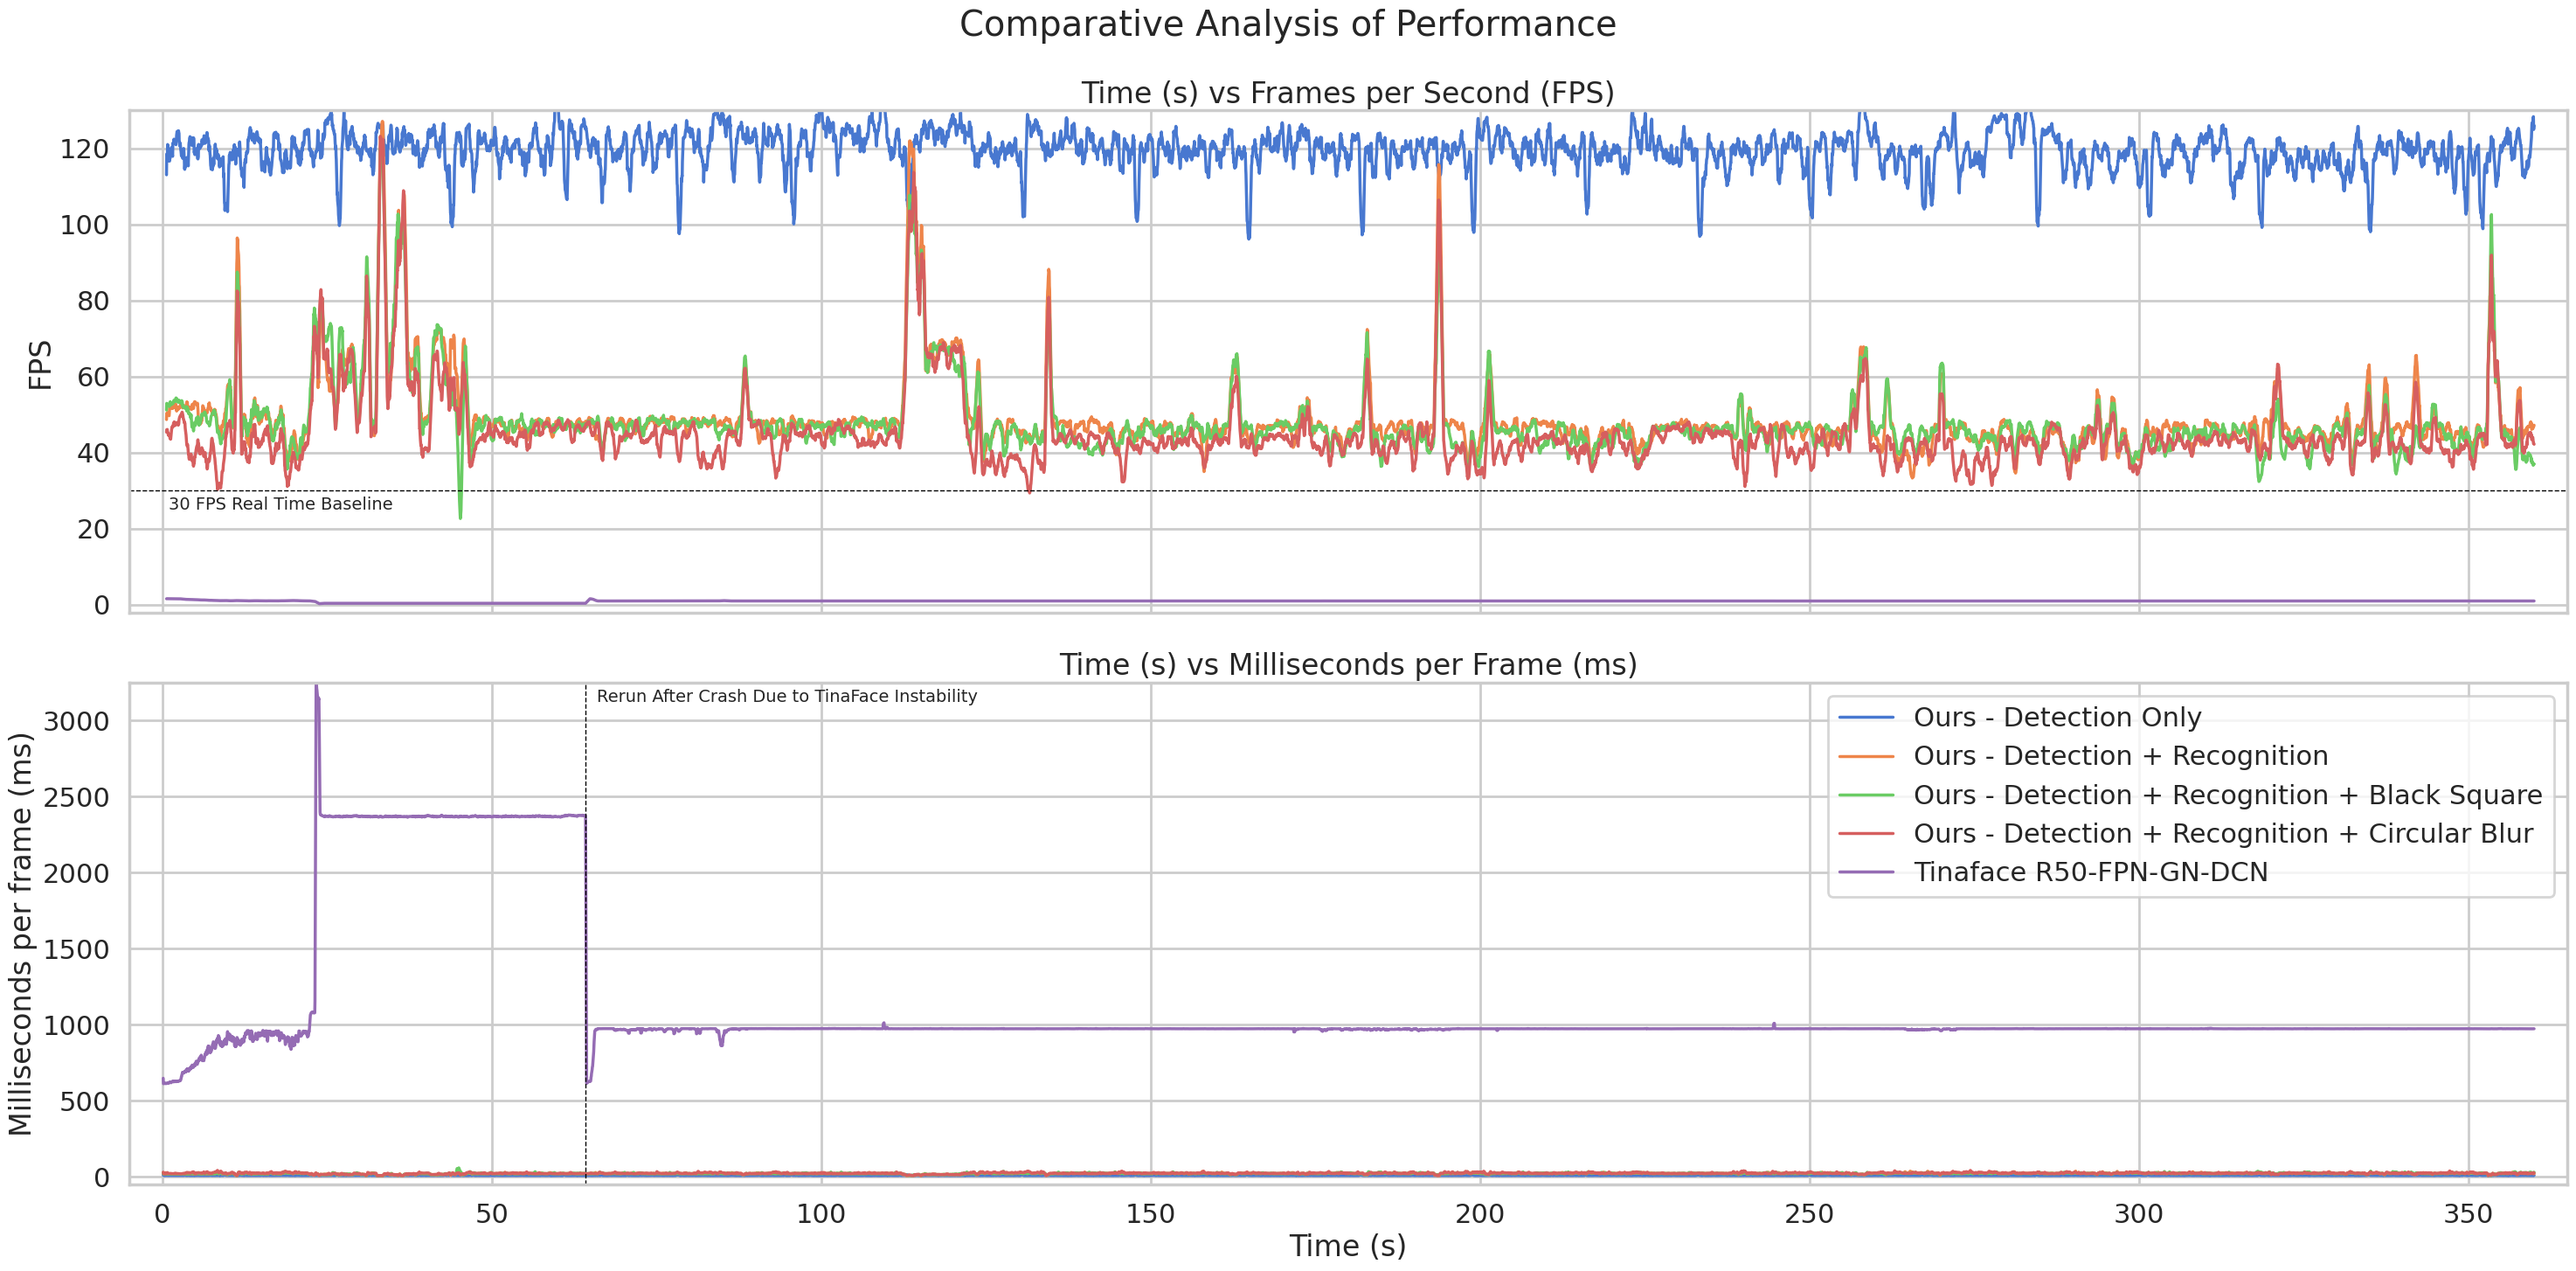

In [51]:
sns.set(style="whitegrid", palette="muted", context="poster")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=True)

# Graph 1: Frame Number vs Frames per Second (FPS)
to_graph = {
    "Ours - Detection Only": df_detection,
    "Ours - Detection + Recognition": df_dr,
    # "Ours - Tracking + Recognition": df_tr,
    "Ours - Detection + Recognition + Black Square": df_drbls,
    "Ours - Detection + Recognition + Circular Blur": df_drbbc,
    # "Ours - Detection + Recognition + Guassian Blur": df_drgc,
    "Tinaface R50-FPN-GN-DCN": df_tina
}

for label, df in to_graph.items():
    sns.lineplot(x=df['s'], y=df['fps'].rolling(window=20).mean(), ax=ax1, label=label, linewidth=2.5)
    
ax1.hlines(30, xmin=-5, xmax=365, label="Real Time Baseline", color="black", linestyle="--", linewidth=1)
ax1.annotate("30 FPS Real Time Baseline", (1, 25), fontsize=14)

ax1.set_title('Time (s) vs Frames per Second (FPS)')
ax1.set_ylabel('FPS')
ax1.set_ylim([-2, 130])
ax1.get_legend().remove()

# Graph 2: Frame Number vs Milliseconds per Frame
for label, df in to_graph.items():
    sns.lineplot(x=df['s'], y=df['time_elapsed'].rolling(window=5).mean(), ax=ax2, label=label, linewidth=2.5)

# frame num / 30
rerun_at = 1928 / 30
ax2.axvline(rerun_at, linestyle='--', linewidth=1, color="black")
ax2.annotate("Rerun After Crash Due to TinaFace Instability", (66, 3120), fontsize=14)


ax2.set_title('Time (s) vs Milliseconds per Frame (ms)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Milliseconds per frame (ms)')
ax2.legend()
ax2.set_xlim([-5, 365])
ax2.set_ylim([-50, 3250])

fig.suptitle('Comparative Analysis of Performance')
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.tight_layout()
plt.savefig("../data/plots/fps-ms-combined-all-large.png")
plt.show()

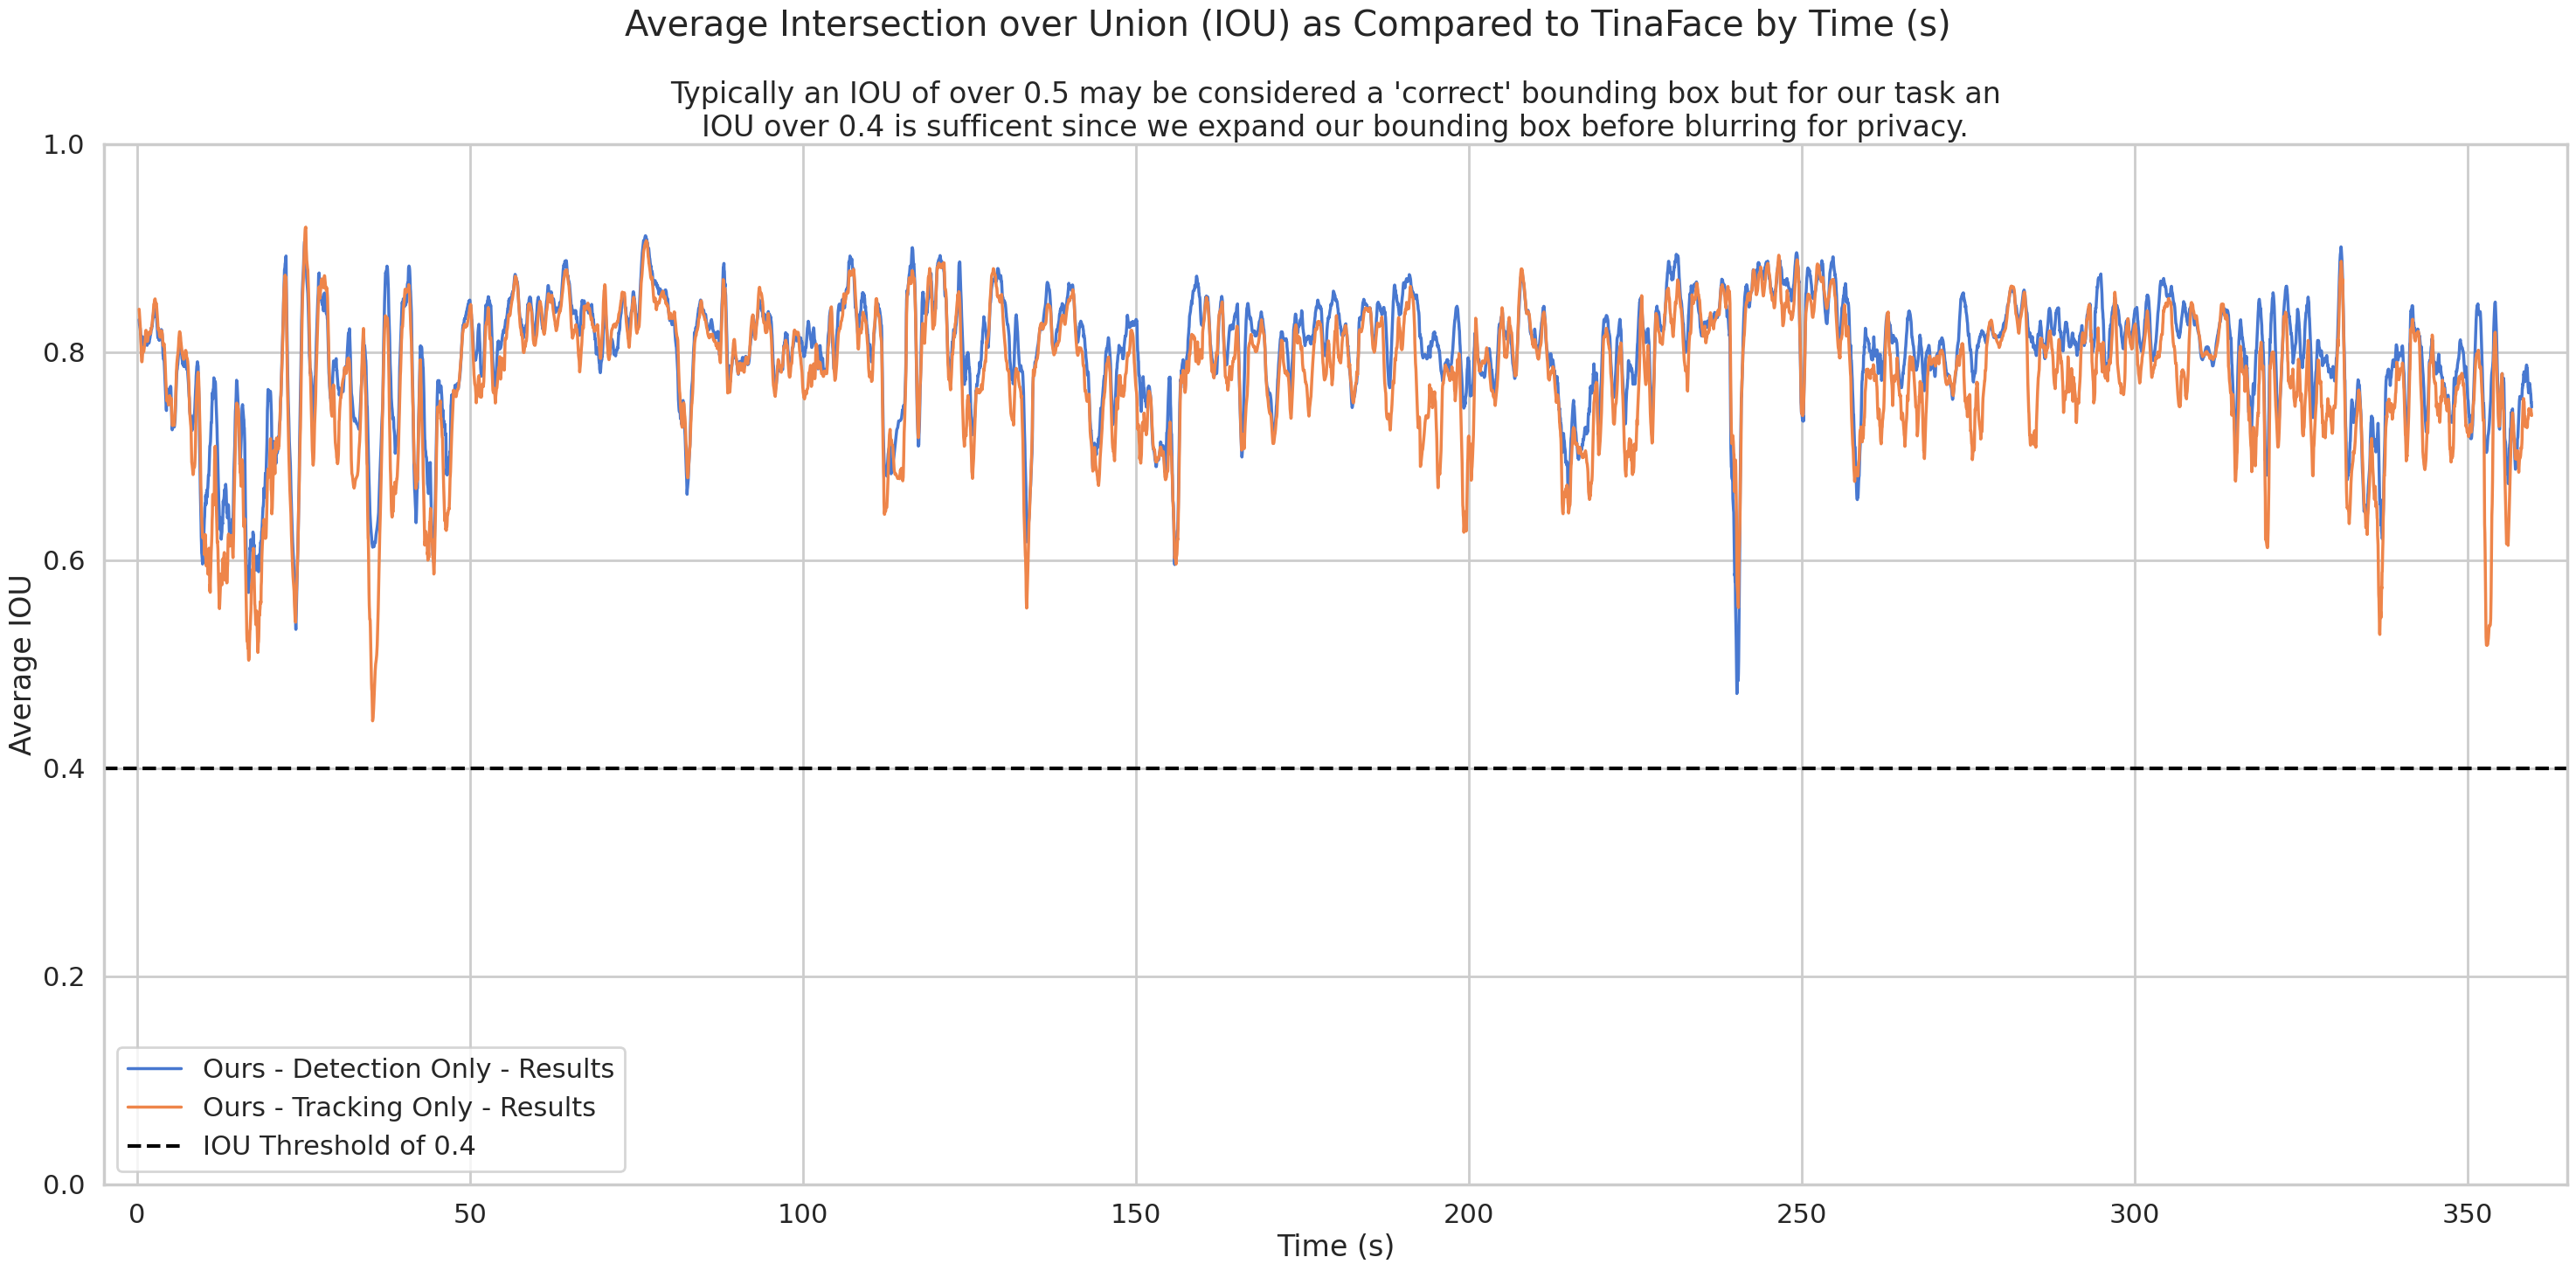

In [52]:
sns.set(style="whitegrid", palette="muted", context="poster")

fig, ax = plt.subplots(1, 1, figsize=(30, 15))

for label, (res, miss) in dfs_results.items():
    if "Detection Only" in label or "Tracking Only" in label:
        filtered_data = res[res["missed"] == False].groupby("frame_num").mean().rolling(window=20).mean()
        sns.lineplot(data=filtered_data, x='s', y='iou', label=label, linewidth=2.5)

ax.set_xlim([-5, 365])
ax.set_ylim([0, 1])

plt.hlines(IOU_THRESH, label=f"IOU Threshold of {IOU_THRESH}", xmin=-5, xmax=365, linestyle="--", color="black")

plt.suptitle('Average Intersection over Union (IOU) as Compared to TinaFace by Time (s)')
plt.title(f"Typically an IOU of over 0.5 may be considered a 'correct' bounding box but for our task an\nIOU over {IOU_THRESH} is sufficent since we expand our bounding box before blurring for privacy.")
plt.xlabel('Time (s)')
plt.ylabel('Average IOU')

fig.tight_layout()
plt.legend()
plt.savefig("../data/plots/average-iou-by-time-large.png")
plt.show()

In [ ]:
sns.set(style="whitegrid", palette="muted", context="poster")

fig, ax = plt.subplots(1, 1, figsize=(30, 15))
bin_size = 5

for label, (res, miss) in dfs_results.items():
    if "Detection Only" in label or "Tracking Only" in label:
        # sns.lineplot(x=miss["s"], y=miss["missed"].rolling(window=25).mean(), label=label, linewidth=1.25)
        bins = np.arange(0, 361, bin_size, dtype=int)
        miss["time bin"] = pd.cut(miss["s"], bins, right=False, labels=[i * bin_size for i in range(len(bins)-1)])
        
        sns.pointplot(data=miss, x="time bin", y="missed", dodge=True, label=label[:label.index(" - Results")], linewidth=3)
        # grouped_data = miss.groupby("time bin", as_index=False)['missed'].mean()
        # sns.pointplot(data=grouped_data, x="time bin", y="missed", dodge=True)

for i, l in enumerate(ax.xaxis.get_ticklabels()):
    if i % 5 != 0:
        l.set_visible(False)


ax.hlines(0, label=f"Tinaface R50-FPN-GN-DCN Baseline", xmin=-5, xmax=365 / bin_size, color="purple", linewidth=3)
ax.legend(loc="lower left")
        
ax.set_xlim([-5 / bin_size, 365 / bin_size])
# ax.set_ylim([-7, 6])

plt.suptitle('Number of Excess Bounding Boxes as Compared to TinaFace by Time (s)')
plt.title('Negative values indicate our model missed a face')
plt.xlabel('Time (s)')
plt.ylabel('Excess Bounding Boxes')

fig.tight_layout()
plt.savefig("../data/plots/excess-bboxes-by-time-bin-large.png")
plt.show()